Parametric Correlation Coefficient Exercises

Plotting X v Y

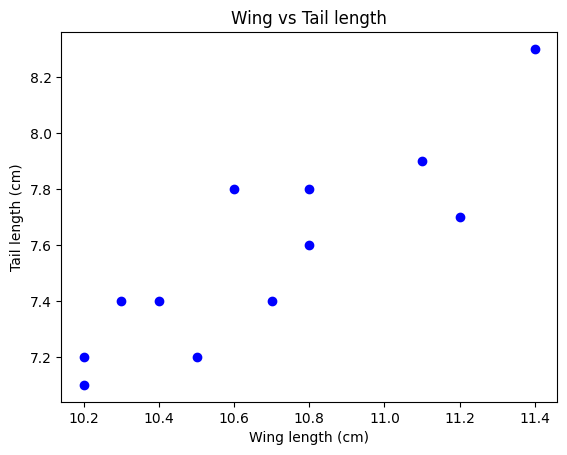

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
X = [10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4]
Y = [7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3]

# Plot
plt.scatter(X, Y, color="blue")
plt.xlabel("Wing length (cm)")
plt.ylabel("Tail length (cm)")
plt.title("Wing vs Tail length")
plt.show()

Calculating Rxy Ryx

In [2]:
import numpy as np

X = np.array(X)
Y = np.array(Y)

# Manual formula for Pearson's r
x_mean, y_mean = np.mean(X), np.mean(Y)
cov_xy = np.sum((X - x_mean) * (Y - y_mean)) / (len(X)-1)
std_x, std_y = np.std(X, ddof=1), np.std(Y, ddof=1)
r_xy = cov_xy / (std_x * std_y)

# Symmetry: r_yx is the same
r_yx = r_xy

print(f"Manual calculation: r_xy = {r_xy:.3f}, r_yx = {r_yx:.3f}")

# Using numpy corrcoef
r_matrix = np.corrcoef(X, Y)
print("NumPy corrcoef matrix:\n", r_matrix)


Manual calculation: r_xy = 0.870, r_yx = 0.870
NumPy corrcoef matrix:
 [[1.         0.87035456]
 [0.87035456 1.        ]]


Standard Error & 95% CI

In [3]:
from scipy import stats

n = len(X)

# Standard error of r
se_r = np.sqrt((1 - r_xy**2) / (n - 2))
print(f"Standard error of r = {se_r:.4f}")

# 95% CI via Fisher z-transform
z_r = np.arctanh(r_xy)  # Fisher transform
se_z = 1 / np.sqrt(n - 3)
z_crit = stats.norm.ppf(0.975)  # two-tailed 95%
z_ci = [z_r - z_crit*se_z, z_r + z_crit*se_z]
r_ci = [np.tanh(z) for z in z_ci]

print(f"95% CI for r = ({r_ci[0]:.3f}, {r_ci[1]:.3f})")


Standard error of r = 0.1557
95% CI for r = (0.592, 0.963)


Significance Testing for H

In [4]:
dfree = n - 2
t_stat = r_xy / se_r
p_val_t = 2 * (1 - stats.t.cdf(abs(t_stat), df=dfree))

print(f"t statistic = {t_stat:.3f}, df = {dfree}, p = {p_val_t:.4f}")

if p_val_t < 0.05:
    print("Reject H0: correlation is significant at p<0.05")
else:
    print("Fail to reject H0: not significant at p<0.05")


t statistic = 5.589, df = 10, p = 0.0002
Reject H0: correlation is significant at p<0.05


Comparing to Yale H0 of r = 0.75

In [5]:
rho0 = 0.75
z_rho0 = np.arctanh(rho0)

# z statistic
z_stat = (z_r - z_rho0) / se_z
p_val_rho0 = 2 * (1 - stats.norm.cdf(abs(z_stat)))

print(f"Test vs rho0=0.75: z = {z_stat:.3f}, p = {p_val_rho0:.4f}")

if p_val_rho0 < 0.05:
    print("Reject H0: our correlation is significantly different from 0.75")
else:
    print("Fail to reject H0: cannot distinguish from 0.75")


Test vs rho0=0.75: z = 1.085, p = 0.2780
Fail to reject H0: cannot distinguish from 0.75


Statistical power and sample size for r ≥ 0.5

In [6]:
import statsmodels.stats.power as smp

# Parameters
alpha = 0.05
effect_size = 0.5  # expected correlation

# Current sample power
analysis = smp.NormalIndPower()
fisher_z = np.arctanh(effect_size)
fisher_se = 1 / np.sqrt(n - 3)
z_obs = fisher_z / fisher_se
power_current = analysis.power(effect_size=z_obs, nobs=n, alpha=alpha, alternative='two-sided')

print(f"Statistical power with n={n} for r=0.5: {power_current:.3f}")

# Required sample size for 80% power
# Use correlation_power function from statsmodels
from statsmodels.stats.power import correlation_power

needed_n = correlation_power(effect_size=effect_size, alpha=alpha, power=0.8, alternative='two-sided')
print(f"Required sample size for 80% power at r=0.5: {needed_n:.0f}")


TypeError: NormalIndPower.power() got an unexpected keyword argument 'nobs'. Did you mean 'nobs1'?